# **Useful Plots**

## **Get Data**

In [ ]:
import pandas as pd

labels = pd.read_csv('cluster_labels.csv')
bursts_durations = pd.read_csv('durations_from_filenames.csv')

# Merge the two DataFrames on the 'GRB' column
clustered_with_durations = pd.merge(labels, bursts_durations, on='GRB', how='left')

pd.save_csv('clustered_with_durations.csv', clustered_with_durations, index=False)

## **Plot GRBs**
As of now, we'll be plotting the outlying GRBs extracted from _Model 1.3_.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

outliers = pd.read_csv('outlier_burst_ids.csv')['burst_id'].tolist()
lcs = pd.read_csv('lcs.csv')
channels = ['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'na', 'nb', 'b0', 'b1']

for burst_id in outliers:
    burst_df = lcs[lcs['burst'] == burst_id]

    plt.figure(figsize=(12, 6))
    for ch in channels:
        plt.plot(burst_df[ch].values, label=ch, linewidth=0.8)

    plt.title(f'Light Curve for Outlier Burst {burst_id}')
    plt.xlabel('Time Index')
    plt.ylabel('Intensity')
    plt.legend(ncol=3, fontsize='small')
    plt.tight_layout()
    plt.show()

### **Save GRB Plots in a PDF**

In [12]:
from matplotlib.backends.backend_pdf import PdfPages

pdf = PdfPages('outlier_light_curves.pdf')

for burst_id in outliers:
    burst_df = lcs[lcs['burst'] == burst_id]

    fig, ax = plt.subplots(figsize=(14, 7))
    for ch in channels:
        ax.plot(burst_df[ch].values, label=ch, linewidth=1)

    ax.set_title(f'Light Curve for Outlier Burst {burst_id}', fontsize=18)
    ax.set_xlabel('Time Index', fontsize=14)
    ax.set_ylabel('Photon Count', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.legend(ncol=5, fontsize=10, loc='upper right', frameon=False)

    pdf.savefig(fig)
    plt.close(fig)

pdf.close()


## **Plot Histograms by Burst Type**

Saved clustered_with_durations.csv with shape: (2930, 3)
   burst_id  cluster_label  duration
0  80714745              0      59.6
1  80715950              1       7.9
2  80717543              0      36.6
3  80719529              0      16.1
4  80723557              1      58.4


## **Plot Mean Light Curve by Cluster**

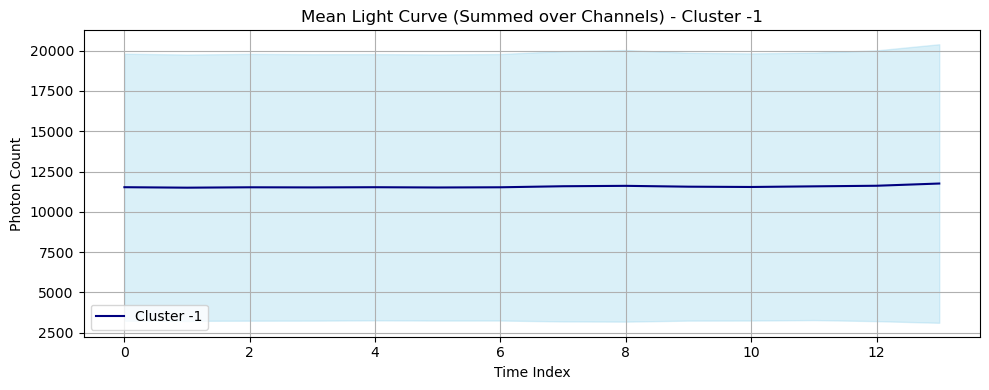

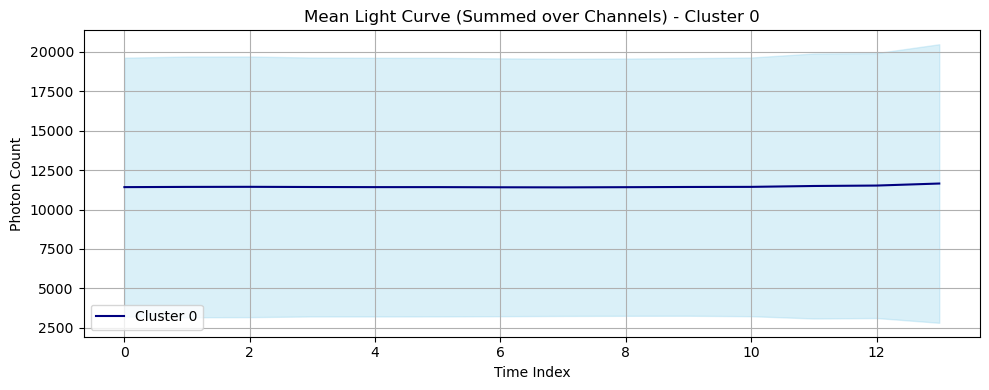

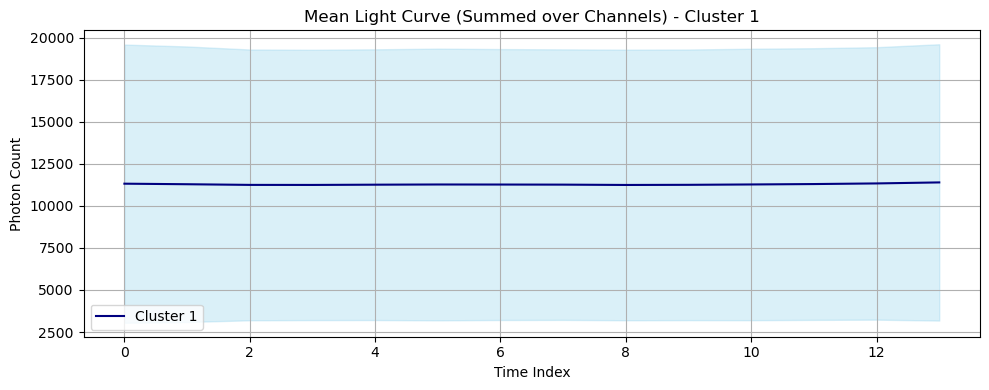

## **Plot Photon Count by Cluster**

In [6]:
# Total photon count
df["photon_sum"] = df["total_curve"].apply(lambda x: np.sum(x))

import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="cluster_label", y="photon_sum")
plt.title("Total Photon Count by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Sum of Photon Counts")
plt.show()

ModuleNotFoundError: No module named 'seaborn'

## **Plot Peak Location by Time Index**

In [ ]:
df["peak_index"] = df["total_curve"].apply(lambda x: np.argmax(x))

plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="cluster_label", y="peak_index")
plt.title("Peak Location (Time Index) by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Index of Peak Photon Count")
plt.show()